In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
x = data.data
y = data.target

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,stratify=y,random_state=1,test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
xtrain_std = std.fit_transform(xtrain)
xtest_std = std.fit_transform(xtest)

In [ ]:
from sklearn.decomposition import PCA

lpca = PCA(n_components=4) # how many main lines
xtrain_pca = lpca.fit_transform(xtrain_std)
xtest_pca = lpca.transform(xtest_std)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xtrain_pca,ytrain)
ytrain_pred = lr.predict(xtrain_pca)
ytest_pred = lr.predict(xtest_pca)

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(ytest,ytest_pred))

# principal component count

Eigenvalues:
 [4.7095539  2.63606471 1.55728758 0.93422662 0.85129454 0.5709688
 0.46462025 0.37764772 0.10409155 0.14951983 0.21165109 0.2630501
 0.27571434]


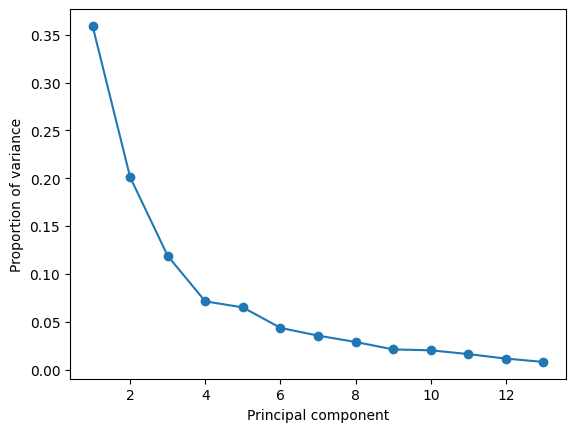

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the covariance matrix
scov = np.cov(xtrain_std.T) # IDK what T is...

# Calculate the eigenvalues and eigenvectors
eigen_vals, eigen_vecs = np.linalg.eig(scov)
print('Eigenvalues:\n', eigen_vals)

total = sum(eigen_vals)
var_exp = [(i / total) for i in sorted(eigen_vals, reverse=True)]

plt.plot(range(1, 14), var_exp, marker='o')
plt.ylabel('Proportion of variance')
plt.xlabel('Principal component')
plt.show()
#image shows 4 is very good for.... principal component count